In [1]:
#作业二
#李彦泽
#2012009
#计算机科学与技术

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import random
from numpy.linalg import inv

In [121]:
#中心化
def Normalization_fun(x):
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

In [122]:
#数据导入
data = pd.read_csv('winequality-white.csv')

# 数据分割
X = data.iloc[:, 0:-1]  
X = Normalization_fun(X)
Y = data.iloc[:, -1]

# 加入常数项
X = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)

#数据分割
X_train = X.sample(frac = 0.8, random_state = 0, axis = 0)
X_test = X[~X.index.isin(X_train.index)]
Y_train = Y.sample(frac = 0.8, random_state = 0, axis = 0)
Y_test = Y[~Y.index.isin(Y_train.index)]

# 转化为数组格式
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

# 初始化模型参数
t_coef = np.random.random(12)

In [123]:
#row  输入数值
#coef 回归模型参数

def predict(row, coef):
    y = 0
    for i in range(len(row)-1):
        y += float(coef[i]) * float(row[i])
    return y

In [124]:
#n_epoch 训练次数
#l_rate  训练步长

def Random_descent(l_rate, n_epoch):
    coef = copy.deepcopy(t_coef)
    for epoch in range(n_epoch):
        temp = np.random.choice(len(X_train))
        row = X_train[temp]
        ans = Y_train[temp]
        error = float(ans) - predict(row, coef)
        for i in range(0,12):
            coef[i] += (l_rate * error * float(row[i]))
    return coef

In [125]:
#n_epoch 训练次数
#l_rate  训练步长n

def Batch_descent(l_rate, n_epoch):
    coef = copy.deepcopy(t_coef)
    for epoch in range(n_epoch):
        for i in range(0,12):
            error=0
            for j in range(len(Y_train)):
                error += (float(Y_train[j]) - predict(X_train[j], coef))*float(X_train[j][i])
            coef[i]+=l_rate*error/len(Y_train)
    return coef

In [126]:
#num 岭系数

def Ridge(num):
    temp = np.diag([num] * len(t_coef))
    coef = ((inv(X_train.T.dot(X_train) + temp)).dot(X_train.T)).dot(Y_train)
    return np.array(coef)

In [127]:
#计算均方误差

def loss_calc(coef, t_data, t_ans):
    loss = 0
    for i in range(len(t_ans)):
        temp = predict(t_data[i], coef)-t_ans[i]
        loss += temp ** 2
    return loss / len(t_ans)

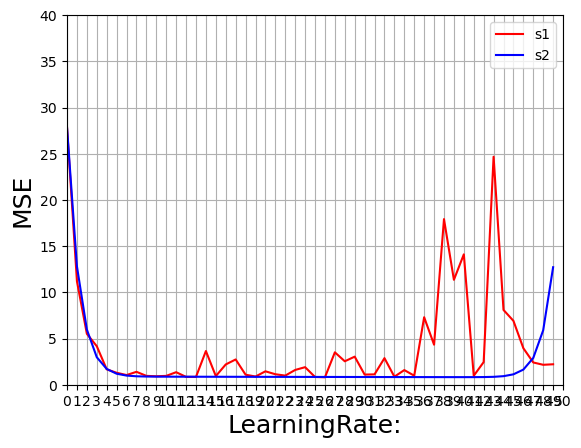

In [128]:
#结果可视化--学习率

MSE_Random = []
MSE_Descent= []
for i in range(0,50): 
    MSE_Random.append(loss_calc(Random_descent(i/25,10),X_train,Y_train))
    MSE_Descent.append(loss_calc(Batch_descent(i/25,10),X_train,Y_train))
plt.xlabel('LearningRate:',fontsize=18)
plt.ylabel('MSE',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 50)
plt.ylim(0,40)
plt.plot(range(0,50),MSE_Random,'r',label='s1')
plt.plot(range(0,50),MSE_Descent,'b',label='s2')
plt.legend()
plt.grid()
plt.show()

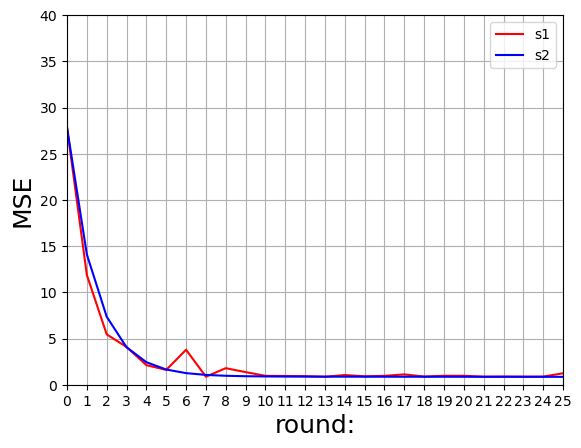

In [129]:
#结果可视化--不同回归算法--学习率根据上问选择0.3

MSE_Random = []
MSE_Descent= []
for i in range(0,50): 
    MSE_Random.append(loss_calc(Random_descent(0.3,i),X_train,Y_train))
    MSE_Descent.append(loss_calc(Batch_descent(0.3,i),X_train,Y_train))
plt.xlabel('round:',fontsize=18)
plt.ylabel('MSE',fontsize=18)
x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0, 25)
plt.ylim(0,40)
plt.plot(range(0,50),MSE_Random,'r',label='s1')
plt.plot(range(0,50),MSE_Descent,'b',label='s2')
plt.legend()
plt.grid()
plt.show()


In [130]:
# 回归模型在统计学和机器学习中的差别

# 回归是一种统计方法，通过这种方法我们既可以训练一个线性回归器，又可以通过最小二乘法拟合一个统计回归模型。

# 机器学习的工作叫做“训练”模型，它只用到了数据的一个子集，而训练得到的模型究竟表现如何需要通过数据的另一个子集测试集测试之后才能知道,机器学
# 习的最终目的是在测试集上获得最佳性能。

# 对于统计学来说，我们则事先假设数据是一个具有高斯噪声的线性回归量，然后试图找到一条线，最大限度地减少了所有数据的均方误差,在这个过程中不需
# 要训练或测试集，数学统计的目的是描述数据与输出变量之间的关系, 而不是对未来数据进行预测,而且评估模型的方法不再是测试集，而是评估模型参数的
# 显著性和健壮性。

# 机器学习的目的是获得一个可反复预测的模型,我们通常不关心模型是否可以解释,机器学习只在乎结果;而统计建模更多的是为了寻找变量之间的关系和确定
# 关系的显著性，恰巧迎合了预测。

In [152]:
# 随机梯度下降
print(loss_calc(Random_descent(0.3,100),X_test,Y_test))
print(loss_calc(Random_descent(0.3,100),X_train,Y_train))

# 批量梯度下降
print(loss_calc(Batch_descent(0.3,25),X_test,Y_test))
print(loss_calc(Batch_descent(0.3,25),X_train,Y_train))

#岭回归
print(Ridge(1))
print(loss_calc(Ridge(1),X_train,Y_train))
print(loss_calc(Ridge(1),X_test,Y_test))

0.7684627249006678
0.8048619192095712
0.8253184873560736
0.8534854380025959
[ 5.8769714  -0.23610054 -1.99527846 -0.02905532  2.46469515 -0.14892213
  0.93565355 -0.1194185  -1.93418878  0.30419025  0.42619545  1.98019041]
0.7310309690988287
0.7021075852144247
